In [1]:
import random
import os
import time
'''
%pylab inline
'''

Populating the interactive namespace from numpy and matplotlib


/home/sanjay/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


All constants

In [2]:
#Discount-factor
GAMMA = 0.95

#ALPHA or step-size
ALPHA = 0.1

#Defining the EPSILON which would ensure regular exploration. Our EPSILON will decrease linearly with each iteration of a episode and will eventually fade away to 0 .
EPSILON = 1

#Number of episodes to consider
TOTAL_EPISODES_TO_CONSIDER = 1000

#Maximum allowed episode length
MAXIMUM_EPISODE_LENGTH = 100

#Number of planning steps
NUMBER_PLANNING_STEPS = 50

#All possible actions defined
ACTION_UP = 'UP'
ACTION_DOWN = 'DOWN'
ACTION_LEFT = 'LEFT'
ACTION_RIGHT = 'RIGHT'

#All actions
all_actions = [ACTION_UP, ACTION_RIGHT, ACTION_DOWN, ACTION_LEFT]

#Start and end of any episode
START_STATE = '18'
END_STATE = '08'

#Forbidden states of the Dyna Maze
FORBIDDEN_STATES = ['11', '20', '29', '41', '07', '16', '25']

#WAIT TIME
wait_time = 0.2

#Defining colors for highlighting important aspects
GREEN = lambda x: '\x1b[32m{}\x1b[0m'.format(x)
BLUE = lambda x: '\x1b[34m{}\x1b[0m'.format(x)
RED = lambda x: '\x1b[31m{}\x1b[0m'.format(x)

Defining the MDP

In [3]:
all_states = ['00', '01', '02', '03', '04', '05', '06', '07', '08',
            '09', '10', '11', '12', '13', '14', '15', '16', '17', 
            '18', '19', '20', '21', '22', '23', '24', '25', '26',
            '27', '28', '29', '30', '31', '32', '33', '34', '35',
            '36', '37', '38', '39', '40', '41', '42', '43', '44',
            '45', '46', '47', '48', '49', '50', '51', '52', '53']

Parameters to mimic the environment. Remember that these parameters won't be known to us, not at least before we start moving our agent.

In [4]:
all_transitions =  {
    '00': {ACTION_UP : '00', ACTION_RIGHT : '01', ACTION_DOWN: '09', ACTION_LEFT: '00'},
    '01': {ACTION_UP : '01', ACTION_RIGHT : '02', ACTION_DOWN: '10', ACTION_LEFT: '00'},
    '02': {ACTION_UP : '02', ACTION_RIGHT : '03', ACTION_DOWN: '02', ACTION_LEFT: '01'},
    '03': {ACTION_UP : '03', ACTION_RIGHT : '04', ACTION_DOWN: '12', ACTION_LEFT: '02'},
    '04': {ACTION_UP : '04', ACTION_RIGHT : '05', ACTION_DOWN: '13', ACTION_LEFT: '03'},
    '05': {ACTION_UP : '05', ACTION_RIGHT : '06', ACTION_DOWN: '14', ACTION_LEFT: '04'},
    '06': {ACTION_UP : '06', ACTION_RIGHT : '06', ACTION_DOWN: '15', ACTION_LEFT: '05'},
    '07': {ACTION_UP : '07', ACTION_RIGHT : '07', ACTION_DOWN: '07', ACTION_LEFT: '07'},
    '08': {ACTION_UP : '08', ACTION_RIGHT : '08', ACTION_DOWN: '17', ACTION_LEFT: '08'},
    '09': {ACTION_UP : '00', ACTION_RIGHT : '10', ACTION_DOWN: '18', ACTION_LEFT: '09'},
    '10': {ACTION_UP : '01', ACTION_RIGHT : '10', ACTION_DOWN: '19', ACTION_LEFT: '09'},
    '11': {ACTION_UP : '11', ACTION_RIGHT : '11', ACTION_DOWN: '11', ACTION_LEFT: '11'},
    '12': {ACTION_UP : '03', ACTION_RIGHT : '13', ACTION_DOWN: '21', ACTION_LEFT: '12'},
    '13': {ACTION_UP : '04', ACTION_RIGHT : '14', ACTION_DOWN: '22', ACTION_LEFT: '12'},
    '14': {ACTION_UP : '05', ACTION_RIGHT : '15', ACTION_DOWN: '23', ACTION_LEFT: '13'},
    '15': {ACTION_UP : '06', ACTION_RIGHT : '15', ACTION_DOWN: '24', ACTION_LEFT: '14'},
    '16': {ACTION_UP : '16', ACTION_RIGHT : '16', ACTION_DOWN: '16', ACTION_LEFT: '16'},
    '17': {ACTION_UP : '08', ACTION_RIGHT : '17', ACTION_DOWN: '26', ACTION_LEFT: '17'},
    '18': {ACTION_UP : '09', ACTION_RIGHT : '19', ACTION_DOWN: '27', ACTION_LEFT: '18'},
    '19': {ACTION_UP : '10', ACTION_RIGHT : '19', ACTION_DOWN: '28', ACTION_LEFT: '18'},
    '20': {ACTION_UP : '20', ACTION_RIGHT : '20', ACTION_DOWN: '20', ACTION_LEFT: '20'},
    '21': {ACTION_UP : '12', ACTION_RIGHT : '22', ACTION_DOWN: '30', ACTION_LEFT: '21'},
    '22': {ACTION_UP : '13', ACTION_RIGHT : '23', ACTION_DOWN: '31', ACTION_LEFT: '21'},
    '23': {ACTION_UP : '14', ACTION_RIGHT : '24', ACTION_DOWN: '32', ACTION_LEFT: '22'},
    '24': {ACTION_UP : '15', ACTION_RIGHT : '24', ACTION_DOWN: '33', ACTION_LEFT: '23'},
    '25': {ACTION_UP : '25', ACTION_RIGHT : '25', ACTION_DOWN: '25', ACTION_LEFT: '25'},
    '26': {ACTION_UP : '17', ACTION_RIGHT : '26', ACTION_DOWN: '35', ACTION_LEFT: '26'},
    '27': {ACTION_UP : '18', ACTION_RIGHT : '28', ACTION_DOWN: '36', ACTION_LEFT: '27'},
    '28': {ACTION_UP : '19', ACTION_RIGHT : '28', ACTION_DOWN: '37', ACTION_LEFT: '27'},
    '29': {ACTION_UP : '29', ACTION_RIGHT : '29', ACTION_DOWN: '29', ACTION_LEFT: '29'},
    '30': {ACTION_UP : '21', ACTION_RIGHT : '31', ACTION_DOWN: '39', ACTION_LEFT: '30'},
    '31': {ACTION_UP : '22', ACTION_RIGHT : '32', ACTION_DOWN: '40', ACTION_LEFT: '30'},
    '32': {ACTION_UP : '23', ACTION_RIGHT : '33', ACTION_DOWN: '32', ACTION_LEFT: '31'},
    '33': {ACTION_UP : '24', ACTION_RIGHT : '34', ACTION_DOWN: '42', ACTION_LEFT: '32'},
    '34': {ACTION_UP : '34', ACTION_RIGHT : '35', ACTION_DOWN: '43', ACTION_LEFT: '33'},
    '35': {ACTION_UP : '26', ACTION_RIGHT : '35', ACTION_DOWN: '44', ACTION_LEFT: '34'},
    '36': {ACTION_UP : '27', ACTION_RIGHT : '37', ACTION_DOWN: '45', ACTION_LEFT: '36'},
    '37': {ACTION_UP : '28', ACTION_RIGHT : '38', ACTION_DOWN: '46', ACTION_LEFT: '36'},
    '38': {ACTION_UP : '38', ACTION_RIGHT : '39', ACTION_DOWN: '47', ACTION_LEFT: '37'},
    '39': {ACTION_UP : '30', ACTION_RIGHT : '40', ACTION_DOWN: '48', ACTION_LEFT: '38'},
    '40': {ACTION_UP : '31', ACTION_RIGHT : '40', ACTION_DOWN: '49', ACTION_LEFT: '39'},
    '41': {ACTION_UP : '41', ACTION_RIGHT : '41', ACTION_DOWN: '41', ACTION_LEFT: '41'},
    '42': {ACTION_UP : '33', ACTION_RIGHT : '43', ACTION_DOWN: '51', ACTION_LEFT: '42'},
    '43': {ACTION_UP : '34', ACTION_RIGHT : '44', ACTION_DOWN: '52', ACTION_LEFT: '42'},
    '44': {ACTION_UP : '35', ACTION_RIGHT : '44', ACTION_DOWN: '53', ACTION_LEFT: '43'},
    '45': {ACTION_UP : '36', ACTION_RIGHT : '46', ACTION_DOWN: '45', ACTION_LEFT: '45'},
    '46': {ACTION_UP : '37', ACTION_RIGHT : '47', ACTION_DOWN: '46', ACTION_LEFT: '45'},
    '47': {ACTION_UP : '38', ACTION_RIGHT : '48', ACTION_DOWN: '47', ACTION_LEFT: '46'},
    '48': {ACTION_UP : '39', ACTION_RIGHT : '49', ACTION_DOWN: '48', ACTION_LEFT: '47'},
    '49': {ACTION_UP : '40', ACTION_RIGHT : '50', ACTION_DOWN: '49', ACTION_LEFT: '48'},
    '50': {ACTION_UP : '50', ACTION_RIGHT : '51', ACTION_DOWN: '50', ACTION_LEFT: '49'},
    '51': {ACTION_UP : '42', ACTION_RIGHT : '52', ACTION_DOWN: '51', ACTION_LEFT: '50'},
    '52': {ACTION_UP : '43', ACTION_RIGHT : '53', ACTION_DOWN: '52', ACTION_LEFT: '51'},
    '53': {ACTION_UP : '44', ACTION_RIGHT : '53', ACTION_DOWN: '53', ACTION_LEFT: '52'},
}

In [5]:
def defineStateActionImmediateRewards():
    immediate_state_rewards = {}
    for state in all_states:
        action_rewards = {}
        if state ==  END_STATE:
            for action in all_actions:
                action_rewards[action] = 1
        else:
            for action in all_actions:
                
                if all_transitions[state][action] == END_STATE:
                    action_rewards[action] = 1
                else:
                    action_rewards[action] = 0
        
        immediate_state_rewards[state] = action_rewards
    return immediate_state_rewards

immediate_state_rewards = defineStateActionImmediateRewards()

In [6]:
def initializeStateActionValuePairs():        
    state_action_value_pairs = {}
    for state in all_states:
        action_rewards = {}
        for action in all_actions:
            action_rewards[action] = 1
        state_action_value_pairs[state] = action_rewards
        
    return state_action_value_pairs

state_action_value_pairs = initializeStateActionValuePairs()

Parameters that are affected by the direct reinforcement learning step

In [7]:
# We initialize our policy. We initialize our state action values with all optimistic values so that we don't get stuck at any deadlocks.
def initializeGreedyPolicy():
    greedy_policy = {}
    for state in all_states:
        greedy_policy[state] = ACTION_RIGHT
    return greedy_policy

greedy_policy = initializeGreedyPolicy()

All model related variables in Dyna architecture

In [8]:
def initializeModelStateActionBag():
    state_action_bag = {}
    for state in all_states:
        action_map = {}
        for action in all_actions:
            action_map[action] = ()
        state_action_bag[state] = action_map
    return state_action_bag

state_action_bag = initializeModelStateActionBag()

In [9]:
def updatePolicy(state_action_value_pairs, greedy_policy):
    for state, action_values in state_action_value_pairs.items():
        highest_valued_action = ACTION_UP
        highest_value = action_values[ACTION_UP]
        if highest_value < action_values[ACTION_RIGHT]:
            highest_valued_action = ACTION_RIGHT
            highest_value = action_values[ACTION_RIGHT]
        if highest_value < action_values[ACTION_DOWN]:
            highest_valued_action = ACTION_DOWN
            highest_value = action_values[ACTION_DOWN]
        if highest_value < action_values[ACTION_LEFT]:
            highest_valued_action = ACTION_LEFT
            highest_value = action_values[ACTION_LEFT]
            
        greedy_policy[state] = highest_valued_action

def chooseActionStochastically():
    random_throw = random.uniform(0, 1)
    if random_throw < 0.25:
        return ACTION_UP
    elif random_throw < 0.5:
        return ACTION_RIGHT
    elif random_throw < 0.75:
        return ACTION_DOWN
    else:
        return ACTION_LEFT
    
def takeAction(immediate_state_rewards, state, action):
    reward = immediate_state_rewards[state][action]
    next_state = all_transitions[state][action]
    return next_state, reward

def printPolicy(greedy_policy):
    print("Latest Policy", end = '')
    for state in all_states:
        if (int(state) % 9) == 0:
            print("\n")
        print(state, "::", greedy_policy[state],"\t", end = '')
    print("\n\n")
    
def printStateActionValuePairs(state_action_value_pairs):
    print(" \t", ACTION_UP, "\t", ACTION_RIGHT, "\t", ACTION_DOWN, "\t", ACTION_LEFT)
    for state in all_states:
        print(state, "\t", "%.2f" % state_action_value_pairs[state][ACTION_UP], "\t", "%.2f" % state_action_value_pairs[state][ACTION_RIGHT], "\t", "%.2f" % state_action_value_pairs[state][ACTION_DOWN], "\t", "%.2f" % state_action_value_pairs[state][ACTION_LEFT],)
    print("\n\n")
    
def printDynaMaze(states_in_episode = []):
    for state in all_states:
        if (int(state) % 9) == 0:
            print("\n")
        
        if state in states_in_episode:
            state = state.replace(state, GREEN(state))
            
        if state in FORBIDDEN_STATES:
            state = state.replace(state, RED(state))
        
        print(state, "\t", end = '')
        
    print("\n")


In [10]:
EPSILON = 1

#Number of episodes to consider
TOTAL_EPISODES_TO_CONSIDER = 50

#Maximum allowed episode length
MAXIMUM_EPISODE_LENGTH = 1000

#Number of planning steps
NUMBER_PLANNING_STEPS = 0

all_observed_state_action_pairs = set()

all_episodes_length = []
all_episodes = []

for episode_iterator in range(TOTAL_EPISODES_TO_CONSIDER):
    
    current_episode = [START_STATE]
    
    EPSILON = (1/((0.2 * episode_iterator) + 1))
    
    current_state = START_STATE
    current_episode_length = 0
    while(current_state != END_STATE and current_episode_length < MAXIMUM_EPISODE_LENGTH):
        current_episode_length += 1
        
        random_throw = random.uniform(0, 1)
        if random_throw < EPSILON:
            current_action = chooseActionStochastically()
        else:
            current_action = greedy_policy[current_state]
    
        #print(current_state, current_action)
        next_state, reward = takeAction(immediate_state_rewards, current_state, current_action)
        
        state_action_value_pairs[current_state][current_action] = state_action_value_pairs[current_state][current_action] + (ALPHA * (reward + (GAMMA * state_action_value_pairs[next_state][greedy_policy[next_state]]) - state_action_value_pairs[current_state][current_action]))
        
        all_observed_state_action_pairs.add((current_state, current_action))
        
        state_action_bag[current_state][current_action] = (reward, next_state)
        
        for planning_iterator in range(NUMBER_PLANNING_STEPS):
            random_picker = int(random.uniform(0, len(all_observed_state_action_pairs)))
            state_action_pair = list(all_observed_state_action_pairs)[random_picker]
            _state = state_action_pair[0]
            _action = state_action_pair[1]
            _reward, _next_state = state_action_bag[_state][_action]
            
            state_action_value_pairs[_state][_action] = state_action_value_pairs[_state][_action] + (ALPHA * (_reward + (GAMMA * state_action_value_pairs[_next_state][greedy_policy[_next_state]]) - state_action_value_pairs[_state][_action]))
        
        #if next_state == END_STATE:
        #    print("Validated")
            
        current_state = next_state
        current_episode.append(current_state)
        updatePolicy(state_action_value_pairs, greedy_policy)
    
    all_episodes.append(current_episode)
    all_episodes_length.append((current_episode_length + 1))
        
#printStateActionValuePairs(state_action_value_pairs)
#printPolicy(greedy_policy)     


In [ ]:
os.system('clear')
for episode_number in range(len(all_episodes)):
    episode = all_episodes[episode_number]
    for step_number in range(len(episode)):
        print("Episode number", str(episode_number))
        printDynaMaze(episode[0:step_number])
        time.sleep(wait_time)
        os.system('clear')
    time.sleep(4 * wait_time)

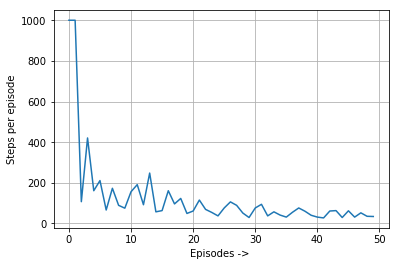

In [11]:
'''
episode_number = [x for x in range(50)]
plot(episode_number, all_episodes_length)
grid(1)
ylabel('Steps per episode')
xlabel('Episodes -> ')
'''

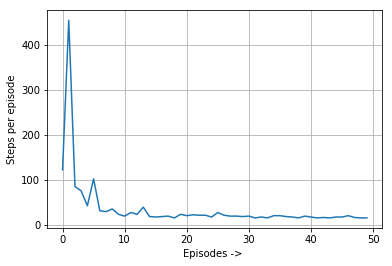

In [11]:
'''
episode_number = [x for x in range(50)]
plot(episode_number, all_episodes_length)
grid(1)
ylabel('Steps per episode')
xlabel('Episodes -> ')
'''